# ACHR - MASTER

In [170]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import scipy
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import hypnogram as hp
import kd_analysis.main.kd_utils as kd
import kd_analysis.main.kd_plotting as kp
import kd_analysis.main.kd_hypno as kh
import kd_analysis.paxilline.pax_fin as kpx
import neurodsp.plts.utils as dspu

import sleep_score_for_me.v4 as ss4
import sleep_score_for_me.v1 as ss1
import sleep_score_for_me.v2 as ss2
import kd_analysis.ACHR.achr_utils as au
import kd_analysis.ACHR.achr_plots as ap

bp_def = dict(delta=(0.5, 4), theta=(4, 8), sigma = (11, 16), beta = (13, 20), low_gamma = (40, 55), high_gamma = (65, 80), omega=(300, 700))

In [17]:
def asses_chans(spg, mspg):
    omega = kd.get_bandpower(mspg, (300, 700))
    delta = kd.get_bandpower(spg, (0.5, 4))
    
    chans = spg.channel.values
    
    fig, axes = plt.subplots(nrows=len(chans)+1, ncols=1, sharex=True, figsize=(35,10))
    ap.simple_bp_lineplot(omega, axes[0], ss=8)
    axes[0].set_title('EMG Omega BP')
    
    for chan in chans:
        d = delta.sel(channel=chan)
        ax = axes[chan]
        ap.simple_bp_lineplot(d, ax)
        ax.set_title('Delta BP Channel-' + str(chan))

In [ ]:
def achr_sd_comp():
    """
    compares the sleep rebound across a laser and control experiment.
    
    """

In [19]:
def achr_reb_as_pob(x, bp_def, sd_length=5):
    """
    returns a full bandpower set (according to bp_def) as a percent of that experiment's baseline
    """

In [168]:
"""ACHR_2 SUBJECT INFORMATION"""
a2_info = {}
a2_info['subject'] = 'ACHR_2'
a2_info['complete_key_list'] = ['control1', 'laser1', 'control1-bl', 'laser1-bl']

In [169]:
"""ACHR_3 SUBJECT INFORMATION"""
a3_info = {}
a3_info['subject'] = 'ACHR_3'
a3_info['complete_key_list'] = ['control1', 'laser1', 'sleep1', 'control1-bl', 'laser1-bl', 'sleep1-bl']

In [188]:
h2 = pd.to_timedelta(2, 'h')
h4 = pd.to_timedelta(4, 'h')
h5 = pd.to_timedelta(5, 'h')

In [214]:
a2de, a2se = au.load_complete_dataset_from_blocks(a2_info, 'EEGr', [1,2,3], time=4, spg=True) 

a3de, a3se = au.load_complete_dataset_from_blocks(a3_info, 'EEGr', [1,2], time=4, cut=5, spg=True) 

In [218]:
a2df, a2sf = au.load_complete_dataset_from_blocks(a2_info, 'LFP_', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], time=4, spg=True) 

a3df, a3sf = au.load_complete_dataset_from_blocks(a3_info, 'LFP_', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], time=4, cut=5, spg=True) 

read from t=0s to t=14923.83s
Using 1017.2526 Hz as SEV sampling rate for LFP_
read from t=0s to t=15712.08s
Using 1017.2526 Hz as SEV sampling rate for LFP_
read from t=0s to t=44673.53s
Using 1017.2526 Hz as SEV sampling rate for LFP_
read from t=0s to t=43265.84s
Using 1017.2526 Hz as SEV sampling rate for LFP_
read from t=18000s to t=32602.91s
Using 3051.7578 Hz as SEV sampling rate for LFP_
read from t=18000s to t=33126.7s
Using 3051.7578 Hz as SEV sampling rate for LFP_
read from t=18000s to t=33617.68s
Using 3051.7578 Hz as SEV sampling rate for LFP_
read from t=0s to t=44338.41s
Using 3051.7578 Hz as SEV sampling rate for LFP_
read from t=0s to t=43753.39s
Using 3051.7578 Hz as SEV sampling rate for LFP_
read from t=0s to t=44076.77s
Using 3051.7578 Hz as SEV sampling rate for LFP_


In [222]:
a2dm, a2sm = au.load_complete_dataset_from_blocks(a2_info, 'EMG_', [1,2], time=4, spg=True) 

a3dm, a3sm = au.load_complete_dataset_from_blocks(a3_info, 'EMGr', [1,2], time=4, cut=5, spg=True)

read from t=0s to t=14923.83s
Using 1017.2526 Hz as SEV sampling rate for EMG_
read from t=0s to t=15712.08s
Using 1017.2526 Hz as SEV sampling rate for EMG_
read from t=0s to t=44673.53s
Using 1017.2526 Hz as SEV sampling rate for EMG_
read from t=0s to t=43265.84s
Using 1017.2526 Hz as SEV sampling rate for EMG_
read from t=18000s to t=32602.91s
read from t=18000s to t=33126.7s
read from t=18000s to t=33617.68s
read from t=0s to t=44338.41s
read from t=0s to t=43753.39s
read from t=0s to t=44076.77s


In [221]:
au.save_dataset(a2de, 'a2de')
au.save_dataset(a3de, 'a3de')
au.save_dataset(a2df, 'a2df')
au.save_dataset(a3df, 'a3df')

In [223]:
au.save_dataset(a2dm, 'a2dm')
au.save_dataset(a3dm, 'a3dm')

# Get SSFM Hypnos

Will use channel-2 for BOTH ACHR_2 and ACHR_3 SD experiments

In [24]:
a2h = {}
a3h = {}

In [178]:
a2h['control1-bl'] = ss4.ssfm_v4(a2de['control1-bl'], a2dm['control1-bl'], chan=2, window_length=10, overlap=1)

In [178]:
a2h['control1'] = ss4.ssfm_v4(a2de['control1'], a2dm['control1'], chan=2, window_length=10, overlap=1)

In [178]:
a2h['laser1-bl'] = ss4.ssfm_v4(a2de['laser1-bl'], a2dm['laser1-bl'], chan=2, window_length=10, overlap=1)

In [178]:
a2h['laser1'] = ss4.ssfm_v4(a2de['laser1'], a2dm['laser1'], chan=2, window_length=10, overlap=1)

passing indexing error (starts_and_ends)
passing indexing error (starts_and_ends)
passing indexing error (starts_and_ends)


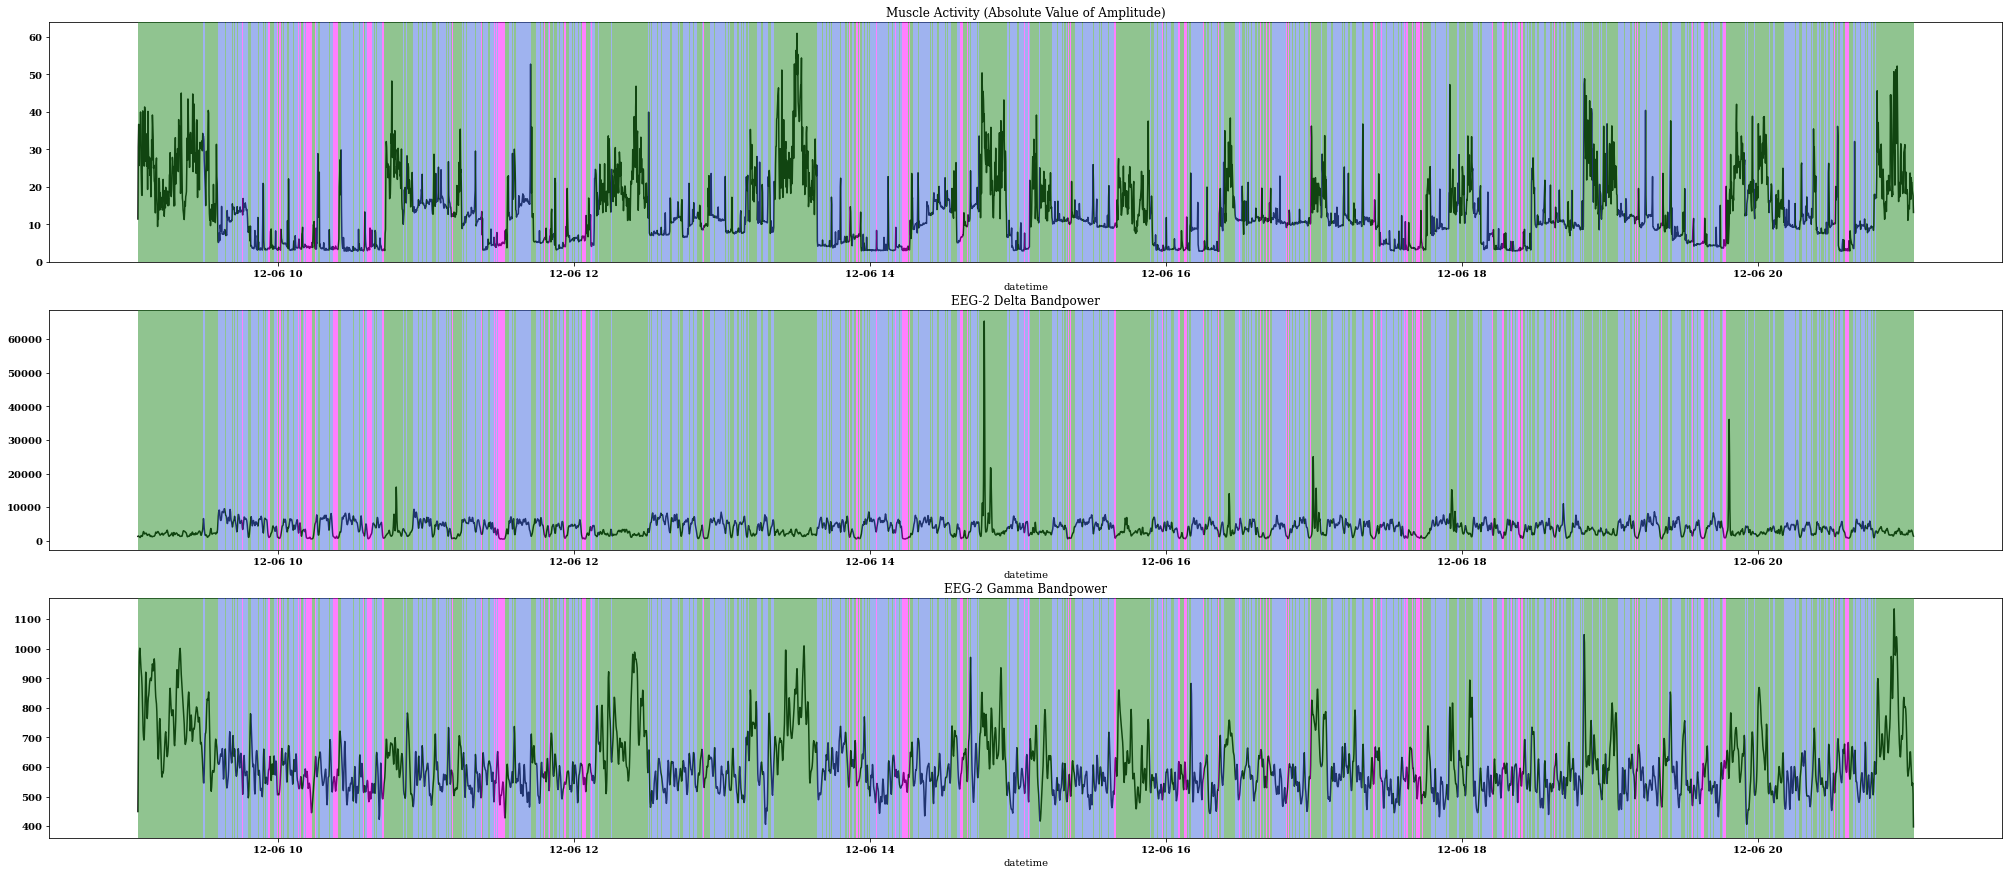

In [193]:
a3h['control1-bl'] = ss4.ssfm_v4(a3de['control1-bl'], a3dm['control1-bl'], chan=2, window_length=10, overlap=1)

passing indexing error (starts_and_ends)
passing indexing error (starts_and_ends)
passing indexing error (starts_and_ends)


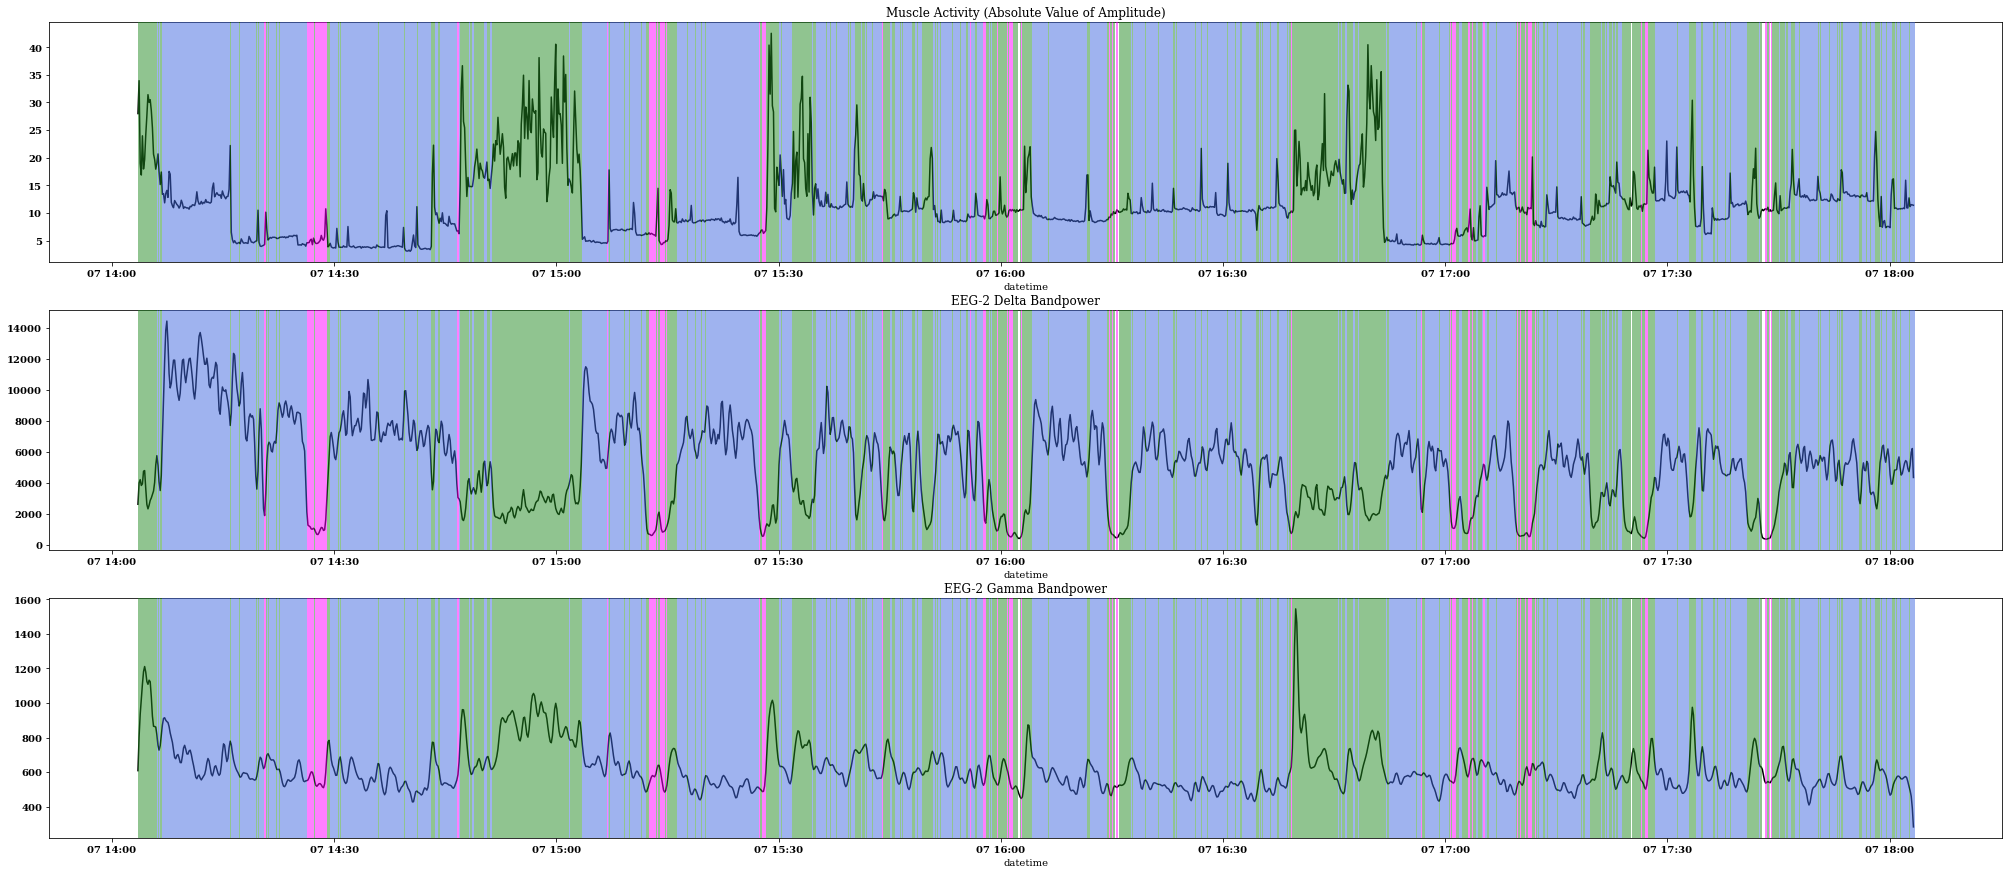

In [194]:
a3h['control1'] = ss4.ssfm_v4(a3de['control1'], a3dm['control1'], chan=2, window_length=10, overlap=1)

passing indexing error (starts_and_ends)
passing indexing error (starts_and_ends)
passing indexing error (starts_and_ends)


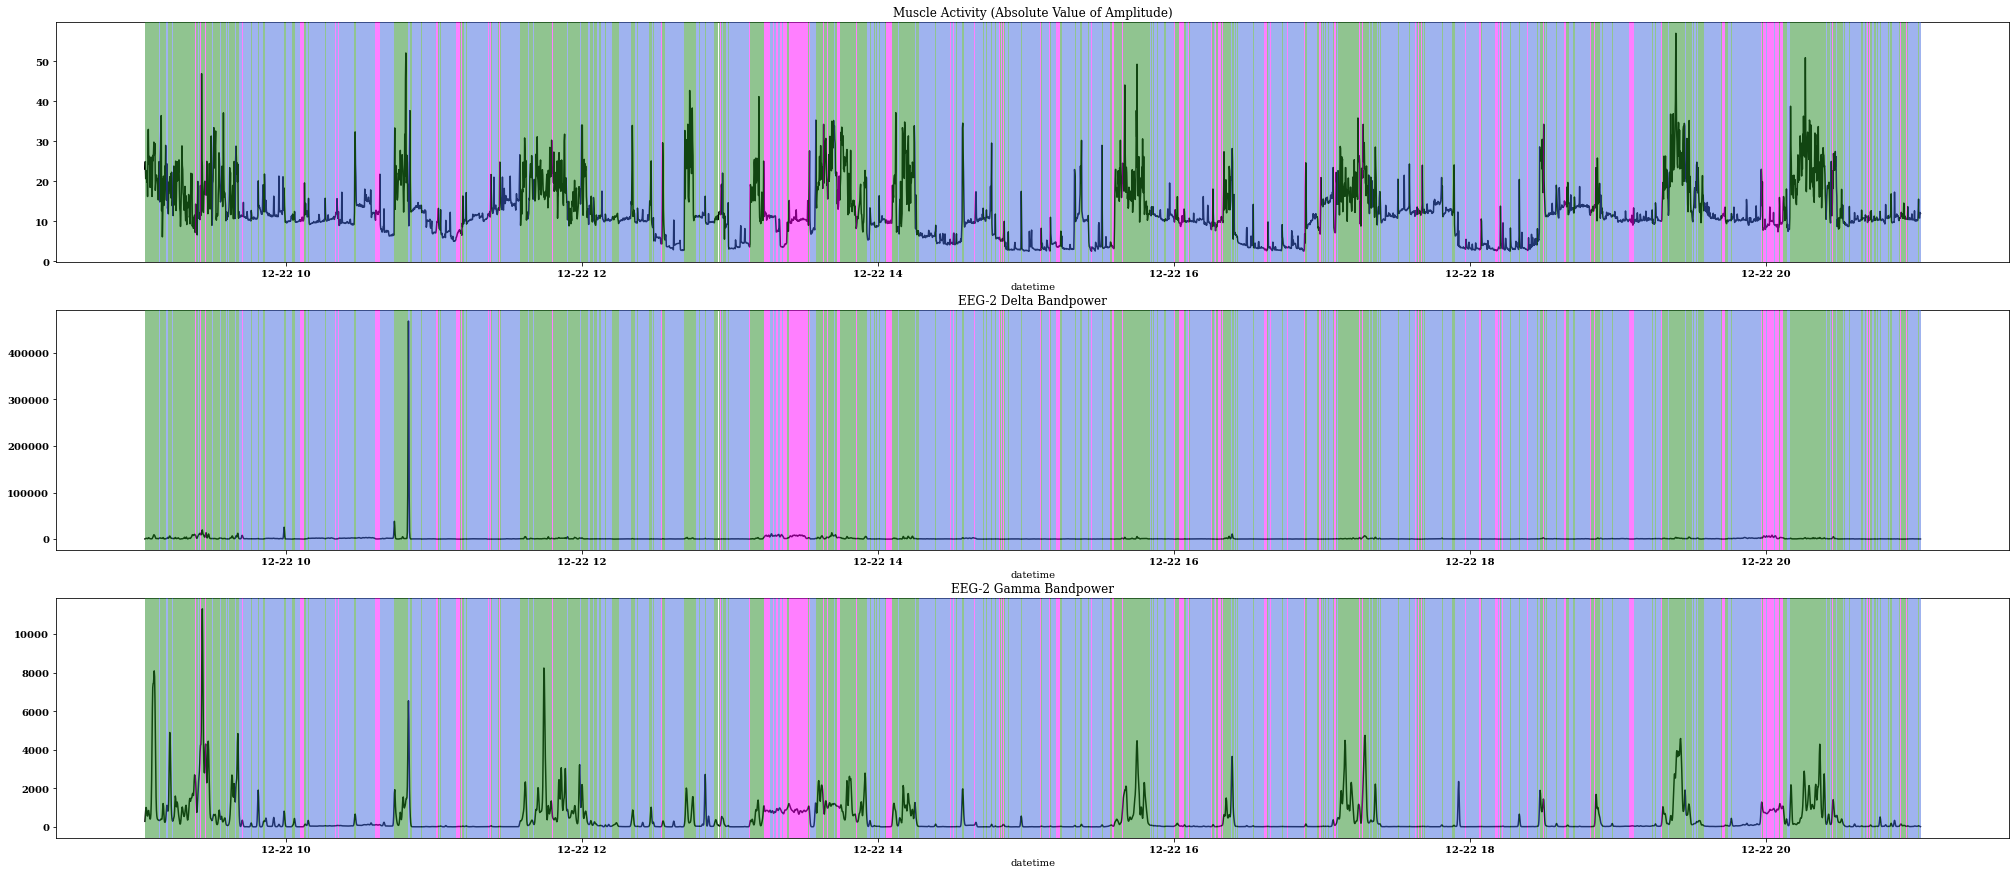

In [195]:
a3h['laser1-bl'] = ss4.ssfm_v4(a3de['laser1-bl'], a3dm['laser1-bl'], chan=2, window_length=10, overlap=1)

passing indexing error (starts_and_ends)
passing indexing error (starts_and_ends)
passing indexing error (starts_and_ends)


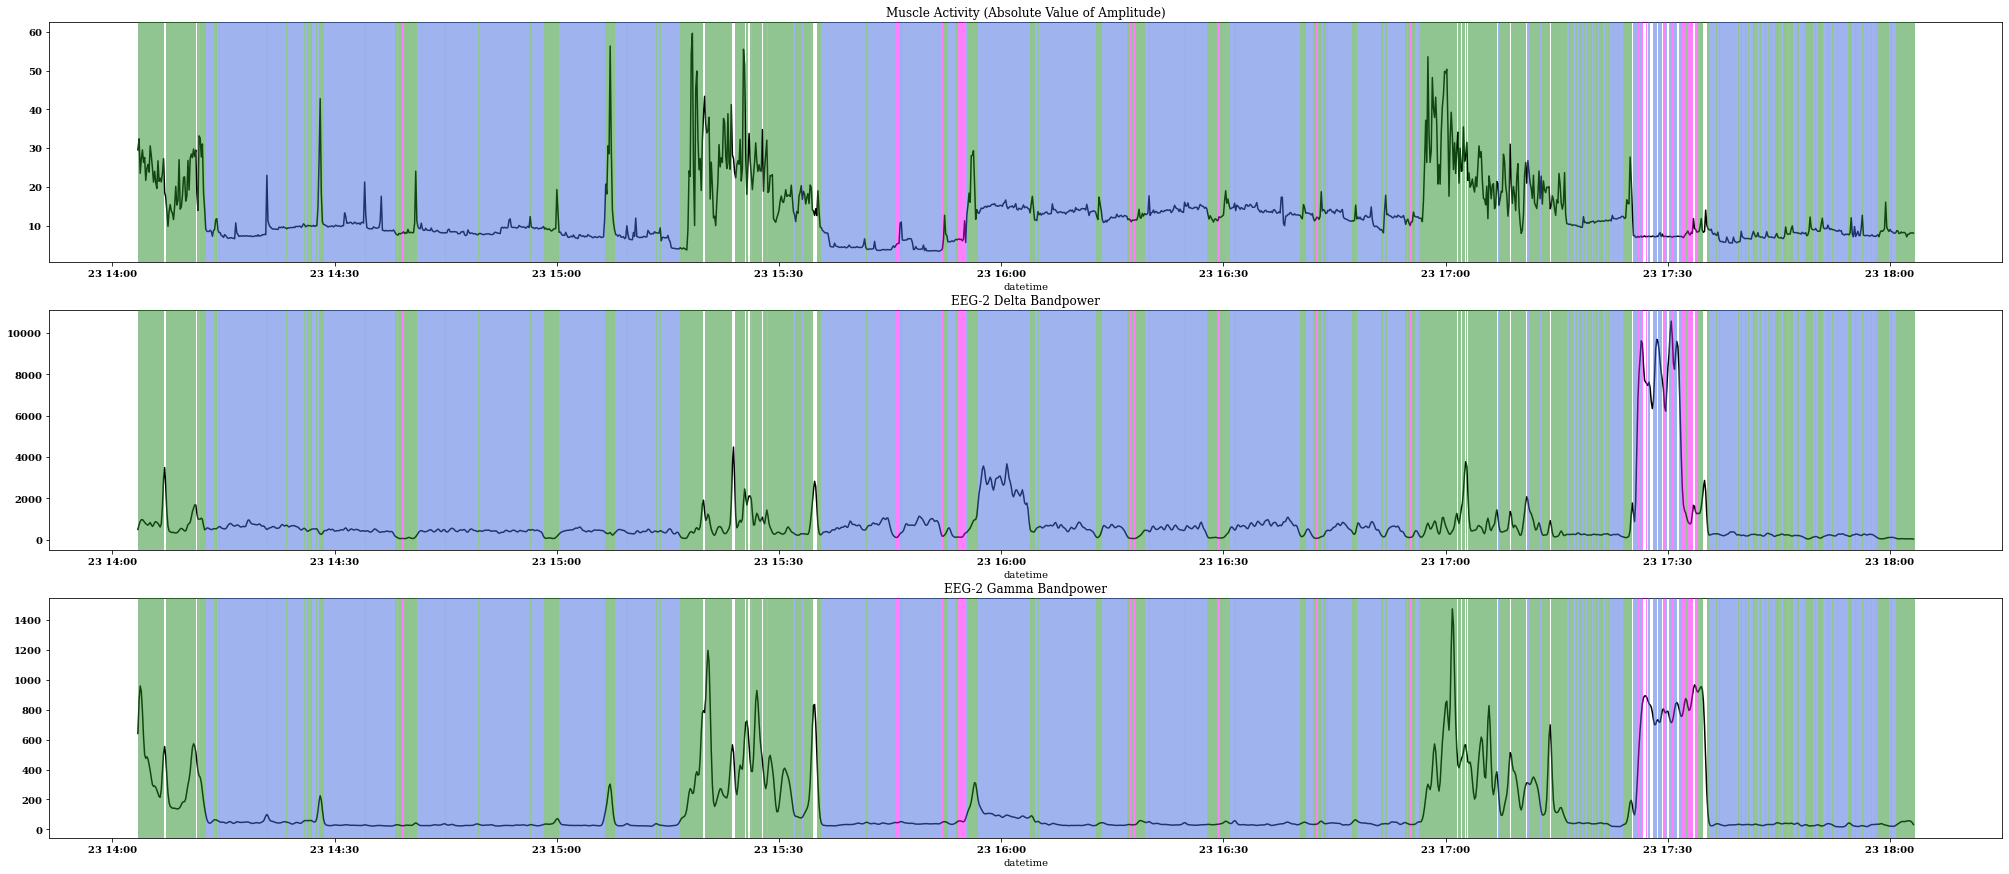

In [212]:
a3h['laser1'] = ss4.ssfm_v4(a3de['laser1'], a3dm['laser1'], chan=2, window_length=10, overlap=1)

# Assessment

In [209]:
def test_metric(t, hyp):
    f, ax = plt.subplots(figsize=(35, 10))
    dt = t.datetime.values
    t = ss4.get_norm_feature(t)
    ax = sns.lineplot(x=dt, y=t, ax=ax)
    kp.shade_hypno_for_me(hyp, ax=ax)
    return ax

# Plots

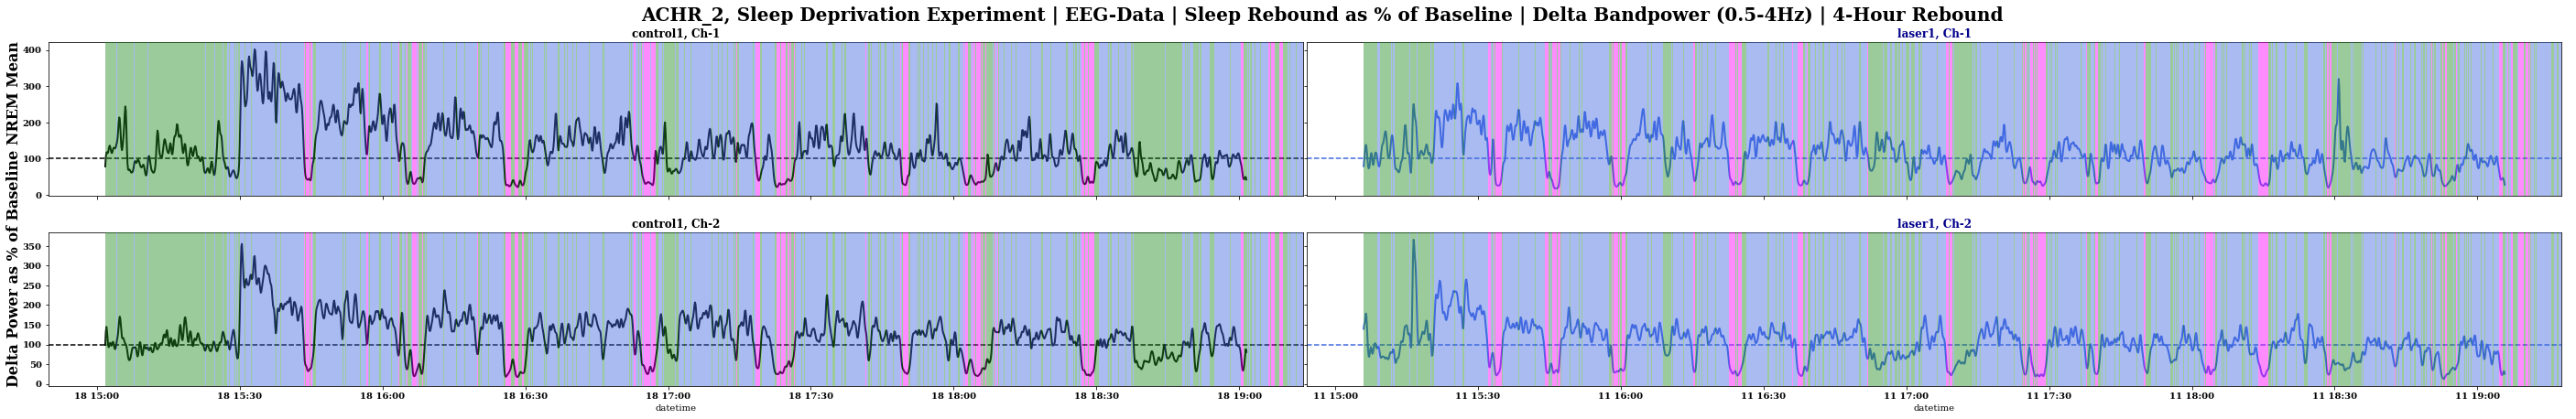

In [198]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.bp_plot_set(x, a2se, a2h)

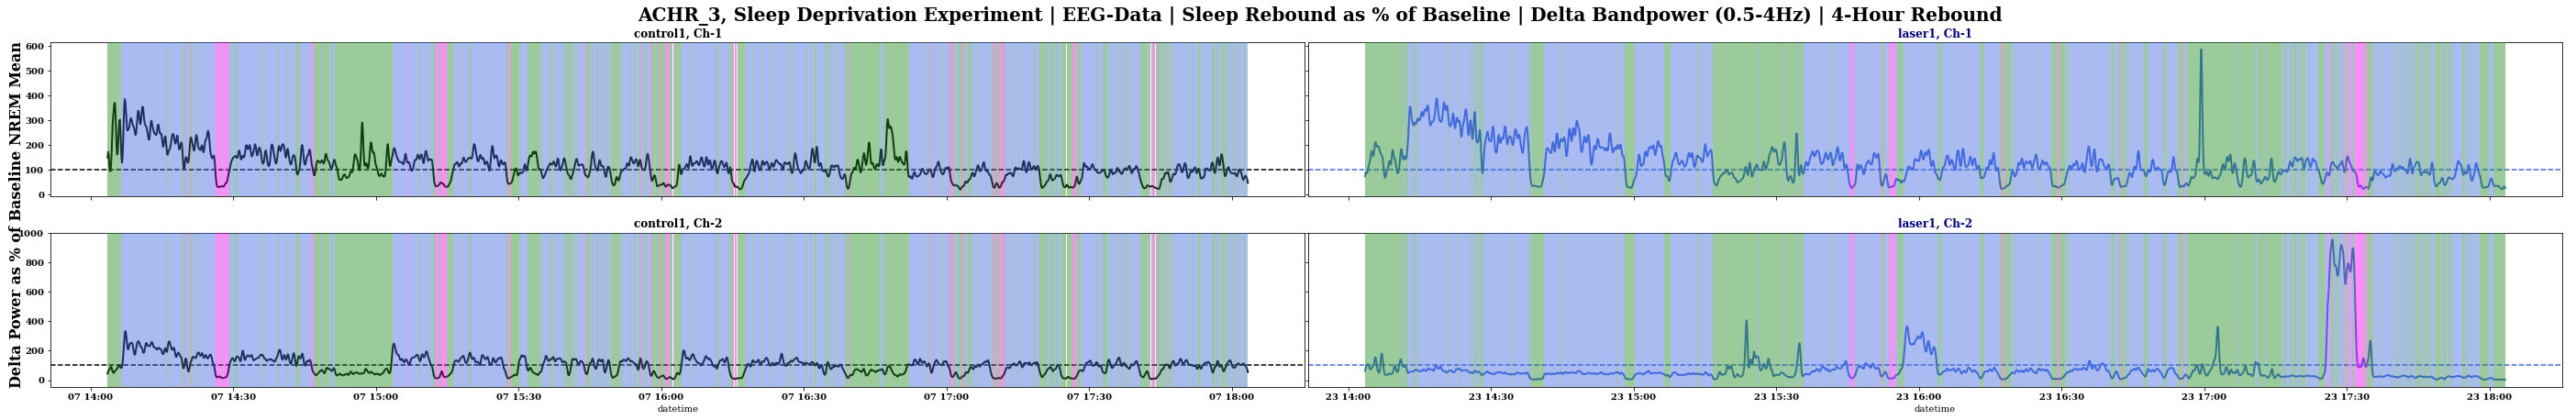

In [205]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.bp_plot_set(x, a3se, a3h)

# MISC

In [108]:
import sleep_score_for_me.artifactus_rejectus as art

<class 'xarray.core.dataarray.DataArray'>


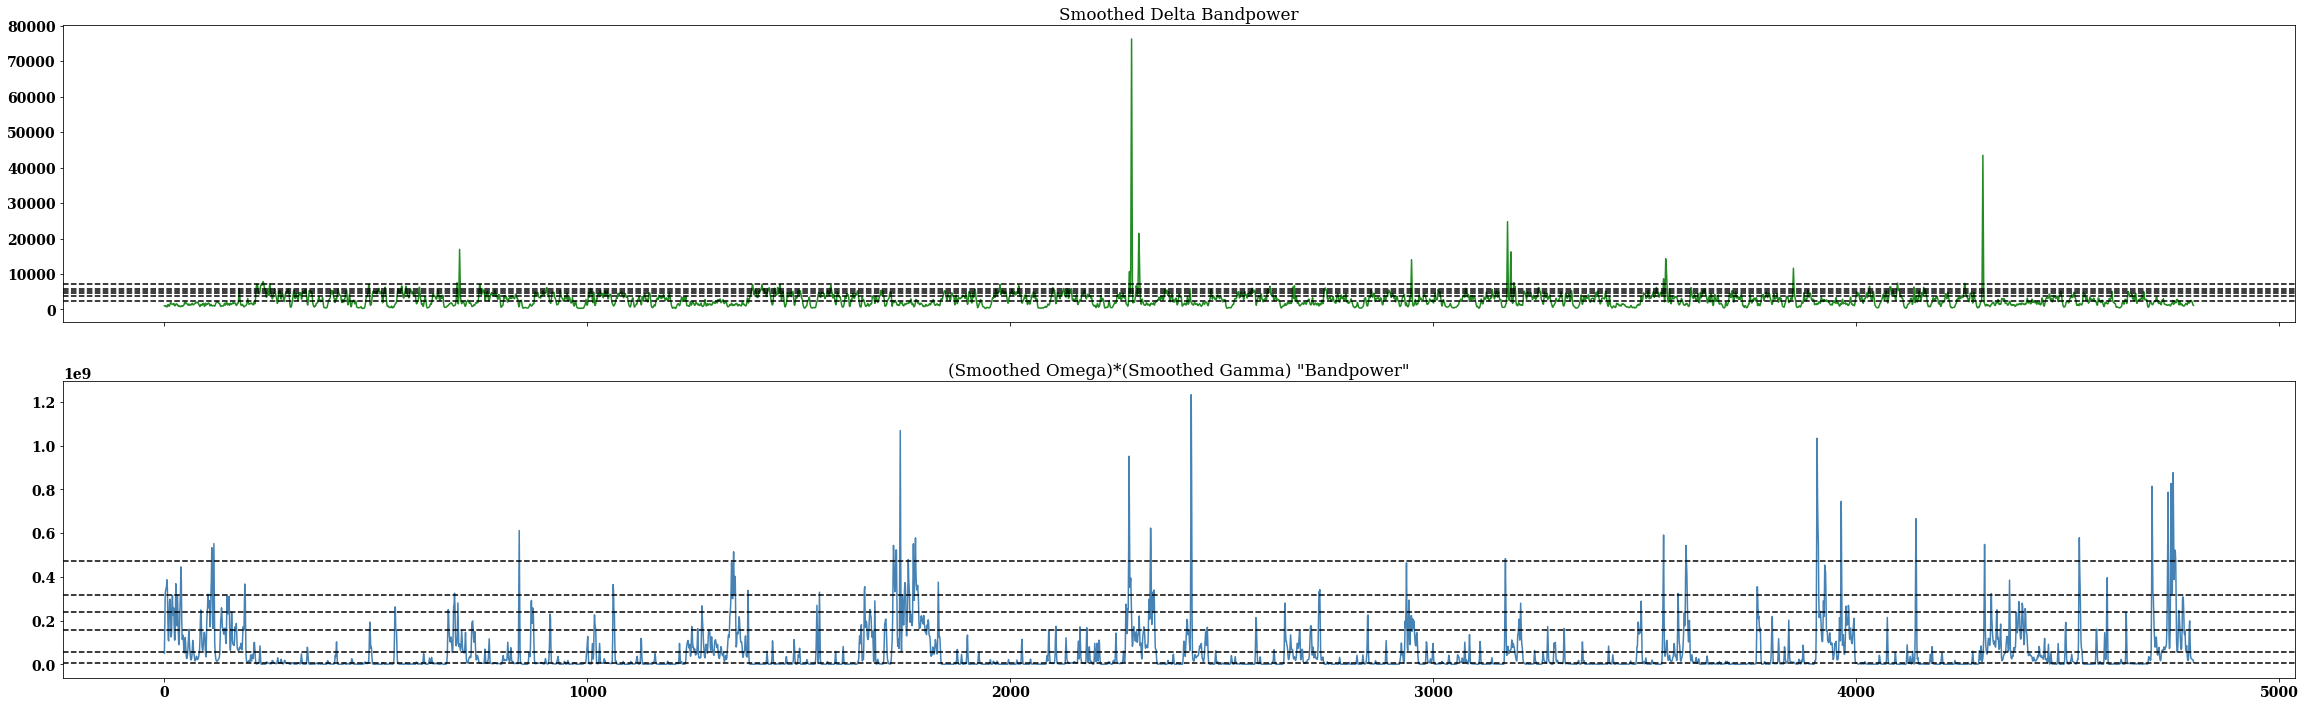

50
75
90
95
97
99


Enter Delta Threshold:  99
Enter Omega-Gamma Threshold:  75


passing indexing error
passing indexing error


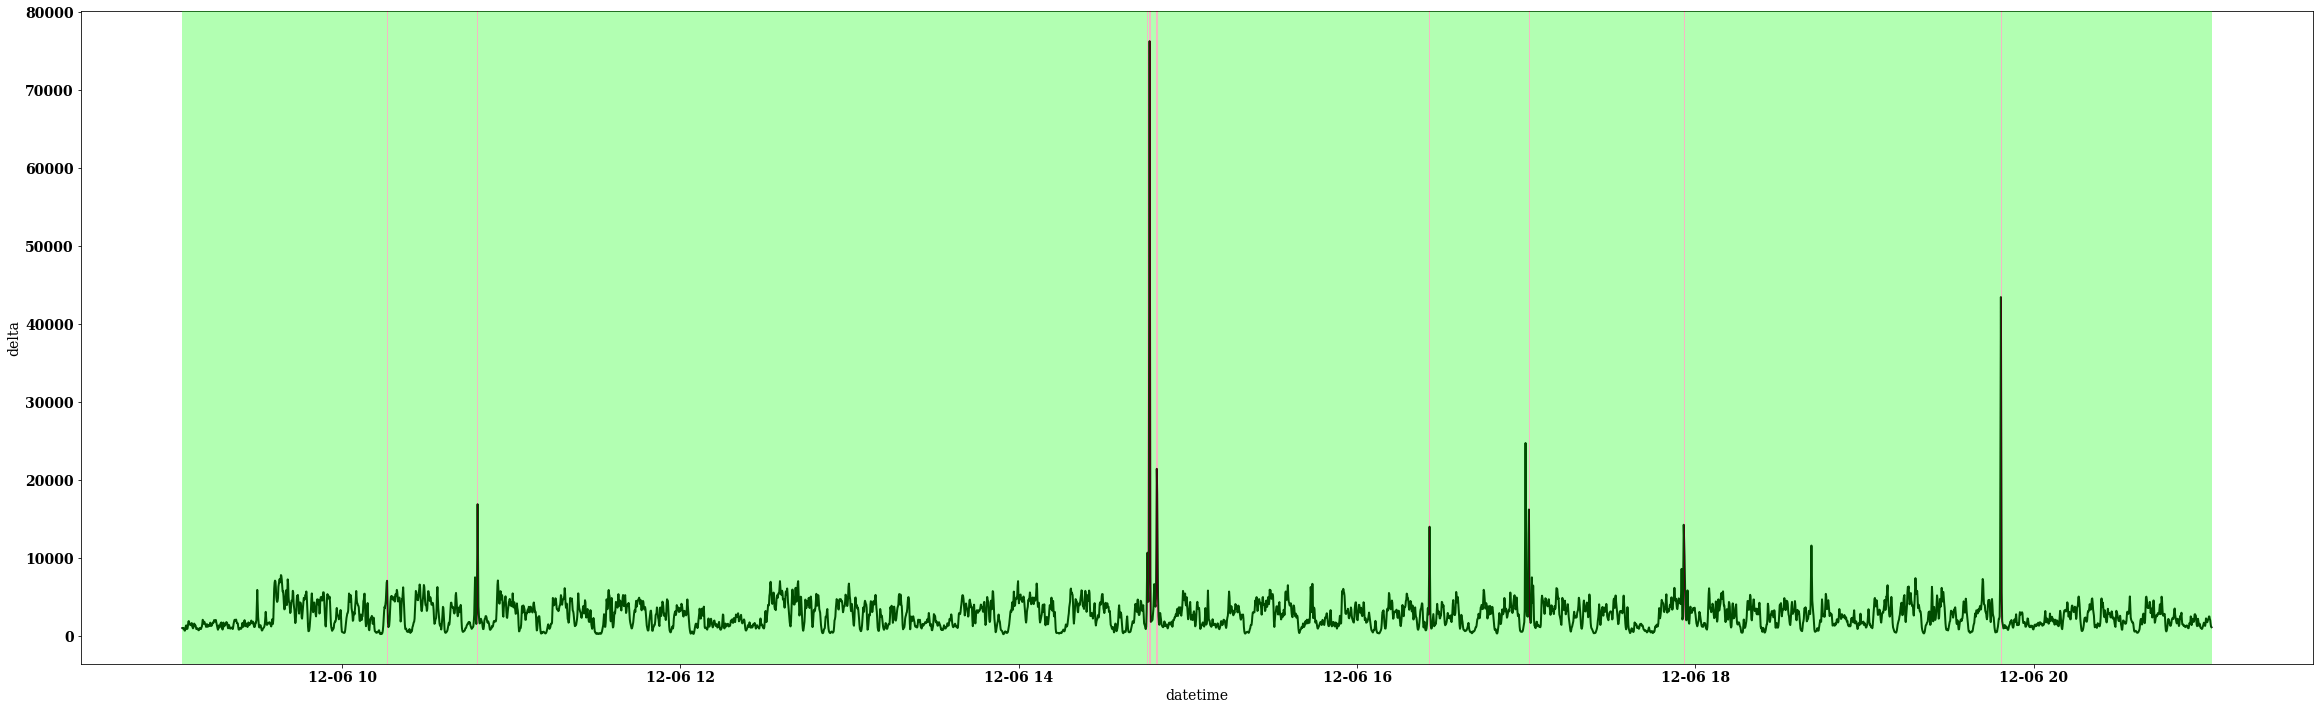

In [111]:
art_hypno = art.artifactus_identicus(c1bl, ms10['control1-bl'], bp_def, chan=2, ss=8)
spg = art.artifactus_rejectus(c1bl, art_hypno)

In [119]:
spg = spg.sel(channel=2)

In [145]:
f_range=slice(0, 100)
spg_np = spg.sel(frequency=f_range).to_numpy().T

In [146]:
spg_np[np.isnan(spg_np)] = 0

In [147]:
pca = PCA(n_components=1)
pca.fit(spg_np)
pc = pca.transform(spg_np).flatten()

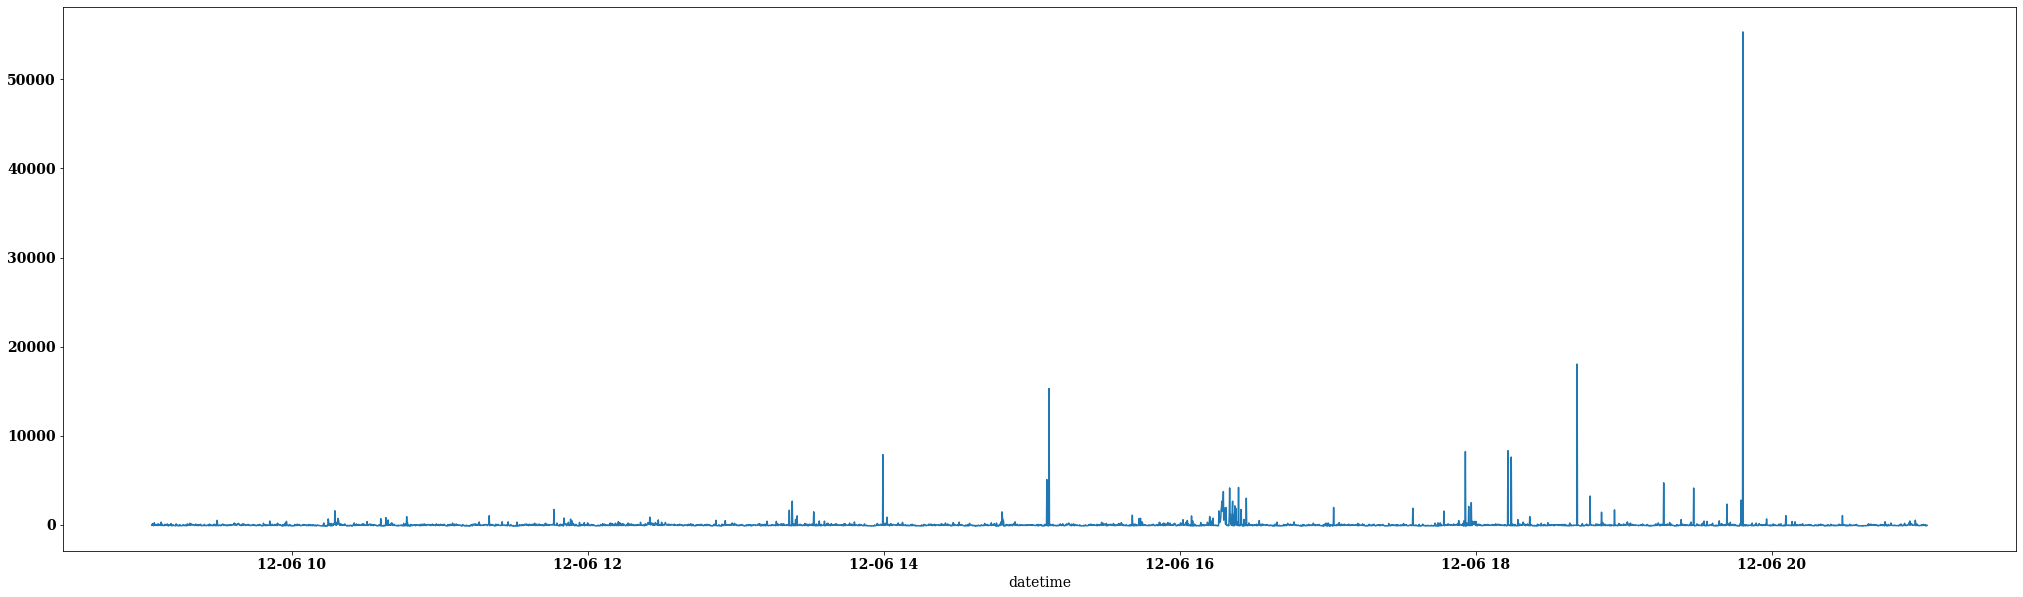

In [151]:
fig, ax = plt.subplots(figsize=(35,10))
ax = sns.lineplot(x=spg.datetime, y=pc, ax=ax)